# Term project (MNIST visualization)
## Objective
    •Deep neural network 구현 및 Visualization  
    •Visualization을 통한 Neural network에 대한 이해 향상

In [1]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torch.nn import ModuleList

from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [2]:
batch_size = 12

train_data = datasets.MNIST('', train=True, transform = transforms.ToTensor())
test_data = datasets.MNIST('', train=False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [3]:
x = train_data.data.reshape(-1, 784)/255.0
y = train_data.targets
print(x.shape)
print(y.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [4]:
feat_cols= [f'pixel{i}' for i in range(28*28)]
df = pd.DataFrame(x.numpy(), columns=feat_cols)
df['y'] = y.numpy()
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


# Input vector PCA and t-SNC


In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df

Explained variation per principal component: [0.09704722 0.07095956]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,pca-one,pca-two
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.485994,-1.226176
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.967504,-1.156249
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.203378,1.537918
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.133869,-2.381186
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,-1.501062,2.864900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,-0.390725,-1.150924
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.599002,-2.697640
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-0.698287,0.627718
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.512135,-0.021911


In [6]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

N =10000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09614986 0.07138532]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.923s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.772041
[t-SNE] KL divergence after 300 iterations: 2.827663
t-SNE done! Time elapsed: 14.278029918670654 seconds


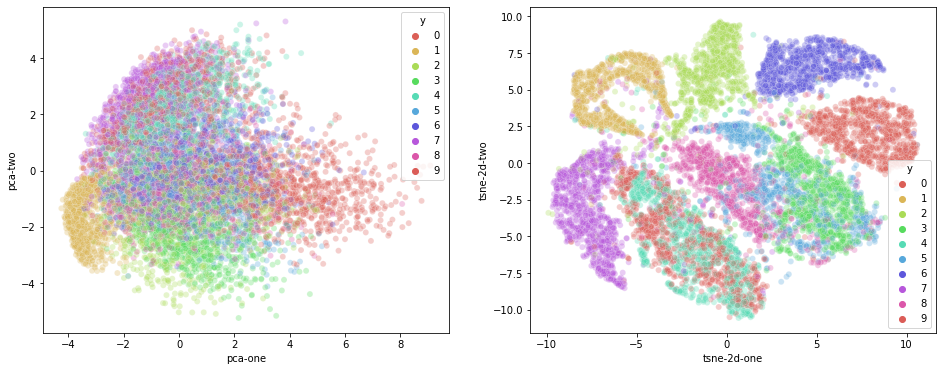

In [7]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# Model

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self, x):
        
        a0 = self.fc1(x.view(-1, self.in_dim))
        z1 = self.relu(a0)
        a1 = self.fc2(z1)
        z2 = self.relu(a1)
        a2 = self.fc3(z2)
        z3 = self.relu(a2)
        a3 = self.fc4(z3)
        z4 = self.relu(a3)        
        logit = self.fc5(z4)

        return logit, (z1, a1, z2, a2)

# Train

In [9]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [10]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs, (z1, a1, z2, a2) = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if (i+1)%2000 == 0:
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.229
[1,  4000] loss: 0.725
[2,  2000] loss: 0.320
[2,  4000] loss: 0.240
[3,  2000] loss: 0.166
[3,  4000] loss: 0.148
[4,  2000] loss: 0.110
[4,  4000] loss: 0.106
[5,  2000] loss: 0.081
[5,  4000] loss: 0.080
[6,  2000] loss: 0.060
[6,  4000] loss: 0.063
[7,  2000] loss: 0.047
[7,  4000] loss: 0.052
[8,  2000] loss: 0.036
[8,  4000] loss: 0.040
[9,  2000] loss: 0.029
[9,  4000] loss: 0.030
[10,  2000] loss: 0.021
[10,  4000] loss: 0.026
Finished Training


# Hidden layer PCA and t-SNE

In [11]:
print(z1.shape)
print(a1.shape)
print(z2.shape)
print(a2.shape)
_, predicted = torch.max(outputs, 1)
predicted.shape

torch.Size([12, 512])
torch.Size([12, 256])
torch.Size([12, 256])
torch.Size([12, 128])


torch.Size([12])

In [38]:
concated_z1 = torch.empty(0, 512)
concated_a1 = torch.empty(0, 256)
concated_z2 = torch.empty(0, 256)
concated_a2 = torch.empty(0, 128)
concated_label = torch.empty(0)

for data in train_loader:
    inputs, labels = data
    outputs, (z1, a1, z2, a2) = model(inputs)
    
    concated_z1 = torch.cat((concated_z1, z1), 0)
    concated_a1 = torch.cat((concated_a1, a1), 0)
    concated_z2 = torch.cat((concated_z2, z2), 0)
    concated_a2 = torch.cat((concated_a2, a2), 0)
    concated_label = torch.cat((concated_label, labels), 0)

In [39]:
print(concated_z1.shape)
print(concated_a1.shape)
print(concated_z2.shape)
print(concated_a2.shape)
print(concated_label.shape)

torch.Size([60000, 512])
torch.Size([60000, 256])
torch.Size([60000, 256])
torch.Size([60000, 128])
torch.Size([60000])


In [41]:
concated_label

tensor([3., 9., 2.,  ..., 0., 7., 1.])

## hidden layer - z1

In [46]:
feat_cols= [f'pixel{i}' for i in range(512)]
df_z1 = pd.DataFrame(concated_z1.detach().numpy(), columns=feat_cols)
df_z1['y'] = concated_label.reshape(-1, 1).detach().numpy()
df_z1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y
0,0.600212,0.000000,0.00000,0.000000,0.069406,0.0,0.000000,0.309150,0.000000,0.000000,...,0.0,0.033885,0.000000,0.000000,0.000000,0.000000,0.000000,0.423168,0.000000,3.0
1,0.000000,0.041558,0.00000,0.000000,0.412723,0.0,0.083934,0.291943,0.000000,0.000000,...,0.0,0.186183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590790,9.0
2,0.116222,0.000000,0.00000,0.274380,0.000000,0.0,0.262583,0.609649,0.000000,0.000000,...,0.0,0.000000,0.234914,0.000000,0.000000,0.029567,0.214788,0.232079,0.000000,2.0
3,0.275726,0.077083,0.00000,0.000000,0.180434,0.0,0.314871,0.000000,0.000000,0.000000,...,0.0,0.000000,0.419480,0.000000,0.000000,0.812152,0.247938,0.000000,0.000000,0.0
4,0.000000,0.617050,0.00000,0.000000,0.186225,0.0,0.079452,0.356728,0.000000,0.000000,...,0.0,0.121747,0.000000,0.133249,0.309088,0.000000,0.000000,0.154407,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.533472,0.262252,0.08848,0.000000,0.000000,0.0,0.000000,0.428301,0.000000,0.000000,...,0.0,0.015220,0.041417,0.000000,0.000000,0.000000,0.055419,0.000000,0.000000,5.0
59996,0.000000,0.000000,0.00000,0.029121,0.000000,0.0,0.148227,0.471290,0.303123,0.218843,...,0.0,0.034060,0.751855,0.000000,0.000000,0.000000,0.000000,0.100933,0.000000,8.0
59997,0.107234,0.000000,0.00000,0.000000,0.453004,0.0,0.406341,0.042707,0.000000,0.000000,...,0.0,0.041285,0.128869,0.000000,0.000000,0.001956,0.710884,0.056867,0.255248,0.0
59998,0.000000,0.090271,0.00000,0.243308,0.647076,0.0,0.473861,0.092662,0.000000,0.100794,...,0.0,0.000000,0.369135,0.000000,0.000000,0.000000,0.000000,0.098318,0.876360,7.0


In [55]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_z1[feat_cols].values)
df_z1['pca-one'] = pca_result[:, 0]
df_z1['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_z1

Explained variation per principal component: [0.1193292  0.10891154]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y,pca-one,pca-two
0,0.600212,0.000000,0.00000,0.000000,0.069406,0.0,0.000000,0.309150,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.423168,0.000000,3.0,1.833599,-1.785707
1,0.000000,0.041558,0.00000,0.000000,0.412723,0.0,0.083934,0.291943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590790,9.0,-0.918314,-0.215426
2,0.116222,0.000000,0.00000,0.274380,0.000000,0.0,0.262583,0.609649,0.000000,0.000000,...,0.234914,0.000000,0.000000,0.029567,0.214788,0.232079,0.000000,2.0,2.080945,-1.298689
3,0.275726,0.077083,0.00000,0.000000,0.180434,0.0,0.314871,0.000000,0.000000,0.000000,...,0.419480,0.000000,0.000000,0.812152,0.247938,0.000000,0.000000,0.0,1.988073,1.870951
4,0.000000,0.617050,0.00000,0.000000,0.186225,0.0,0.079452,0.356728,0.000000,0.000000,...,0.000000,0.133249,0.309088,0.000000,0.000000,0.154407,0.000000,1.0,-1.081267,-1.144041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.533472,0.262252,0.08848,0.000000,0.000000,0.0,0.000000,0.428301,0.000000,0.000000,...,0.041417,0.000000,0.000000,0.000000,0.055419,0.000000,0.000000,5.0,1.561060,-0.106165
59996,0.000000,0.000000,0.00000,0.029121,0.000000,0.0,0.148227,0.471290,0.303123,0.218843,...,0.751855,0.000000,0.000000,0.000000,0.000000,0.100933,0.000000,8.0,0.464624,0.063357
59997,0.107234,0.000000,0.00000,0.000000,0.453004,0.0,0.406341,0.042707,0.000000,0.000000,...,0.128869,0.000000,0.000000,0.001956,0.710884,0.056867,0.255248,0.0,1.763752,1.201830
59998,0.000000,0.090271,0.00000,0.243308,0.647076,0.0,0.473861,0.092662,0.000000,0.100794,...,0.369135,0.000000,0.000000,0.000000,0.000000,0.098318,0.876360,7.0,-0.837672,0.409018


In [56]:
np.random.seed(42)
rndperm = np.random.permutation(df_z1.shape[0])
rndperm

N =10000
df_subset = df_z1.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.12077352 0.1088745 ]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.813762
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.879379
[t-SNE] KL divergence after 300 iterations: 2.623646
t-SNE done! Time elapsed: 12.108434915542603 seconds


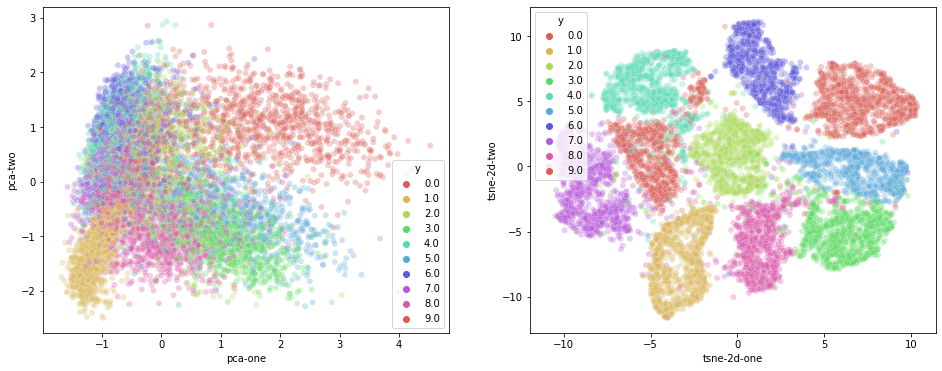

In [57]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

## hidden layer - a1

In [58]:
feat_cols= [f'pixel{i}' for i in range(256)]
df_a1 = pd.DataFrame(concated_a1.detach().numpy(), columns=feat_cols)
df_a1['y'] = concated_label.reshape(-1, 1).detach().numpy()
df_a1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y
0,0.564960,0.716893,-0.055825,-0.343757,0.074902,0.507774,0.236977,0.382150,0.171596,0.342910,...,-0.154700,0.130821,0.704340,0.010127,-0.239498,0.982227,1.136622,0.281197,-0.100426,3.0
1,0.165614,0.019009,0.432724,0.675098,-0.206401,0.687230,0.019853,0.087700,0.052198,0.226399,...,0.062984,0.213973,0.870258,0.598536,0.353786,0.166808,0.396227,-0.038269,-0.123814,9.0
2,0.471574,1.396668,-0.114752,-1.080673,1.357016,0.904572,0.634374,-0.071605,1.337883,0.280197,...,-0.081036,0.137475,0.232331,-0.517401,0.469655,1.218374,0.777369,0.634529,-0.213341,2.0
3,0.103313,-0.316438,0.300649,0.368574,0.358322,-0.103588,0.088016,-0.122488,1.221817,0.284695,...,-0.131749,0.709746,0.298075,0.317630,1.656782,0.034182,0.870331,-0.242368,-0.183897,0.0
4,0.134288,1.055935,0.120608,-0.117941,0.104160,0.921739,0.299440,-0.028073,0.204244,0.286677,...,0.151883,0.202362,0.596174,0.091478,-0.064546,-0.129752,0.242605,0.314490,0.039584,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.180246,1.037334,0.149312,-0.129598,0.063976,0.096402,0.159407,0.224292,-0.013838,0.175316,...,0.104866,0.110281,0.107751,0.577833,0.538231,0.459939,1.032501,0.192458,-0.148940,5.0
59996,0.205619,0.629466,0.148230,-0.122414,0.533155,0.528101,0.250635,-0.064657,0.552766,0.101555,...,-0.080722,0.490445,0.566383,0.127372,0.154286,0.535236,0.527391,0.379250,0.030781,8.0
59997,0.411890,-0.326622,0.234769,0.260525,0.332101,-0.129332,-0.040524,0.123578,0.778749,0.178063,...,-0.019104,0.436011,0.175784,0.777727,1.556519,0.152560,0.833516,0.121503,-0.194475,0.0
59998,0.547193,0.387974,0.248910,0.609375,0.159144,1.192377,0.073367,0.094572,0.498258,0.197462,...,0.268754,0.241553,0.931456,0.269899,0.203296,0.135839,0.391364,0.443338,0.017637,7.0


In [59]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_a1[feat_cols].values)
df_a1['pca-one'] = pca_result[:, 0]
df_a1['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_a1

Explained variation per principal component: [0.22503659 0.17541271]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y,pca-one,pca-two
0,0.564960,0.716893,-0.055825,-0.343757,0.074902,0.507774,0.236977,0.382150,0.171596,0.342910,...,0.704340,0.010127,-0.239498,0.982227,1.136622,0.281197,-0.100426,3.0,4.093302,0.355129
1,0.165614,0.019009,0.432724,0.675098,-0.206401,0.687230,0.019853,0.087700,0.052198,0.226399,...,0.870258,0.598536,0.353786,0.166808,0.396227,-0.038269,-0.123814,9.0,0.471078,-0.202722
2,0.471574,1.396668,-0.114752,-1.080673,1.357016,0.904572,0.634374,-0.071605,1.337883,0.280197,...,0.232331,-0.517401,0.469655,1.218374,0.777369,0.634529,-0.213341,2.0,3.703240,2.514300
3,0.103313,-0.316438,0.300649,0.368574,0.358322,-0.103588,0.088016,-0.122488,1.221817,0.284695,...,0.298075,0.317630,1.656782,0.034182,0.870331,-0.242368,-0.183897,0.0,-4.046966,4.831577
4,0.134288,1.055935,0.120608,-0.117941,0.104160,0.921739,0.299440,-0.028073,0.204244,0.286677,...,0.596174,0.091478,-0.064546,-0.129752,0.242605,0.314490,0.039584,1.0,1.223311,-2.604804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.180246,1.037334,0.149312,-0.129598,0.063976,0.096402,0.159407,0.224292,-0.013838,0.175316,...,0.107751,0.577833,0.538231,0.459939,1.032501,0.192458,-0.148940,5.0,-0.093655,-0.461013
59996,0.205619,0.629466,0.148230,-0.122414,0.533155,0.528101,0.250635,-0.064657,0.552766,0.101555,...,0.566383,0.127372,0.154286,0.535236,0.527391,0.379250,0.030781,8.0,0.063961,0.354599
59997,0.411890,-0.326622,0.234769,0.260525,0.332101,-0.129332,-0.040524,0.123578,0.778749,0.178063,...,0.175784,0.777727,1.556519,0.152560,0.833516,0.121503,-0.194475,0.0,-2.271939,4.553137
59998,0.547193,0.387974,0.248910,0.609375,0.159144,1.192377,0.073367,0.094572,0.498258,0.197462,...,0.931456,0.269899,0.203296,0.135839,0.391364,0.443338,0.017637,7.0,2.113039,1.804437


In [60]:
np.random.seed(42)
rndperm = np.random.permutation(df_a1.shape[0])
rndperm

N =10000
df_subset = df_a1.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.22336316 0.17862202]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.763778
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.562775
[t-SNE] KL divergence after 300 iterations: 2.515088
t-SNE done! Time elapsed: 13.520057916641235 seconds


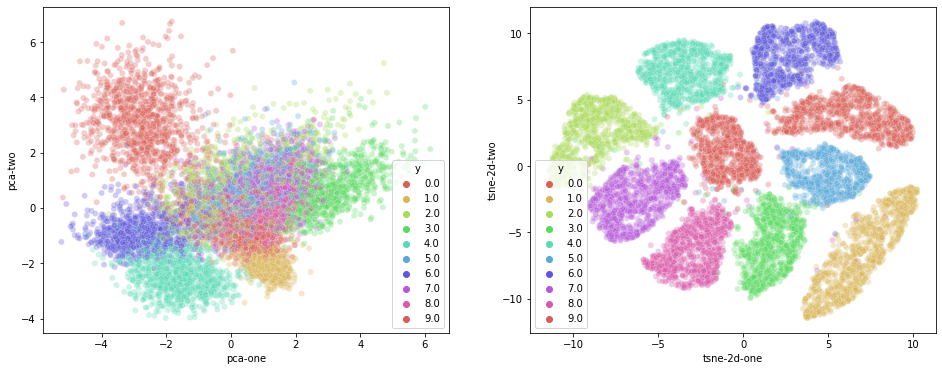

In [61]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# hidden layer - z2

In [65]:
feat_cols= [f'pixel{i}' for i in range(256)]
df_z2 = pd.DataFrame(concated_z2.detach().numpy(), columns=feat_cols)
df_z2['y'] = concated_label.reshape(-1, 1).detach().numpy()
df_z2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y
0,0.564960,0.716893,0.000000,0.000000,0.074902,0.507774,0.236977,0.382150,0.171596,0.342910,...,0.000000,0.130821,0.704340,0.010127,0.000000,0.982227,1.136622,0.281197,0.000000,3.0
1,0.165614,0.019009,0.432724,0.675098,0.000000,0.687230,0.019853,0.087700,0.052198,0.226399,...,0.062984,0.213973,0.870258,0.598536,0.353786,0.166808,0.396227,0.000000,0.000000,9.0
2,0.471574,1.396668,0.000000,0.000000,1.357016,0.904572,0.634374,0.000000,1.337883,0.280197,...,0.000000,0.137475,0.232331,0.000000,0.469655,1.218374,0.777369,0.634529,0.000000,2.0
3,0.103313,0.000000,0.300649,0.368574,0.358322,0.000000,0.088016,0.000000,1.221817,0.284695,...,0.000000,0.709746,0.298075,0.317630,1.656782,0.034182,0.870331,0.000000,0.000000,0.0
4,0.134288,1.055935,0.120608,0.000000,0.104160,0.921739,0.299440,0.000000,0.204244,0.286677,...,0.151883,0.202362,0.596174,0.091478,0.000000,0.000000,0.242605,0.314490,0.039584,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.180246,1.037334,0.149312,0.000000,0.063976,0.096402,0.159407,0.224292,0.000000,0.175316,...,0.104866,0.110281,0.107751,0.577833,0.538231,0.459939,1.032501,0.192458,0.000000,5.0
59996,0.205619,0.629466,0.148230,0.000000,0.533155,0.528101,0.250635,0.000000,0.552766,0.101555,...,0.000000,0.490445,0.566383,0.127372,0.154286,0.535236,0.527391,0.379250,0.030781,8.0
59997,0.411890,0.000000,0.234769,0.260525,0.332101,0.000000,0.000000,0.123578,0.778749,0.178063,...,0.000000,0.436011,0.175784,0.777727,1.556519,0.152560,0.833516,0.121503,0.000000,0.0
59998,0.547193,0.387974,0.248910,0.609375,0.159144,1.192377,0.073367,0.094572,0.498258,0.197462,...,0.268754,0.241553,0.931456,0.269899,0.203296,0.135839,0.391364,0.443338,0.017637,7.0


In [66]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_z2[feat_cols].values)
df_z2['pca-one'] = pca_result[:, 0]
df_z2['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_z2

Explained variation per principal component: [0.21690473 0.18270671]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y,pca-one,pca-two
0,0.564960,0.716893,0.000000,0.000000,0.074902,0.507774,0.236977,0.382150,0.171596,0.342910,...,0.704340,0.010127,0.000000,0.982227,1.136622,0.281197,0.000000,3.0,3.482854,0.846660
1,0.165614,0.019009,0.432724,0.675098,0.000000,0.687230,0.019853,0.087700,0.052198,0.226399,...,0.870258,0.598536,0.353786,0.166808,0.396227,0.000000,0.000000,9.0,0.159020,-0.635065
2,0.471574,1.396668,0.000000,0.000000,1.357016,0.904572,0.634374,0.000000,1.337883,0.280197,...,0.232331,0.000000,0.469655,1.218374,0.777369,0.634529,0.000000,2.0,3.242789,2.707122
3,0.103313,0.000000,0.300649,0.368574,0.358322,0.000000,0.088016,0.000000,1.221817,0.284695,...,0.298075,0.317630,1.656782,0.034182,0.870331,0.000000,0.000000,0.0,-2.978153,3.941097
4,0.134288,1.055935,0.120608,0.000000,0.104160,0.921739,0.299440,0.000000,0.204244,0.286677,...,0.596174,0.091478,0.000000,0.000000,0.242605,0.314490,0.039584,1.0,1.126571,-2.342308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.180246,1.037334,0.149312,0.000000,0.063976,0.096402,0.159407,0.224292,0.000000,0.175316,...,0.107751,0.577833,0.538231,0.459939,1.032501,0.192458,0.000000,5.0,-0.474606,-0.098346
59996,0.205619,0.629466,0.148230,0.000000,0.533155,0.528101,0.250635,0.000000,0.552766,0.101555,...,0.566383,0.127372,0.154286,0.535236,0.527391,0.379250,0.030781,8.0,0.127100,0.449952
59997,0.411890,0.000000,0.234769,0.260525,0.332101,0.000000,0.000000,0.123578,0.778749,0.178063,...,0.175784,0.777727,1.556519,0.152560,0.833516,0.121503,0.000000,0.0,-2.101197,3.485445
59998,0.547193,0.387974,0.248910,0.609375,0.159144,1.192377,0.073367,0.094572,0.498258,0.197462,...,0.931456,0.269899,0.203296,0.135839,0.391364,0.443338,0.017637,7.0,1.750613,0.587305


In [67]:
np.random.seed(42)
rndperm = np.random.permutation(df_z2.shape[0])
rndperm

N =10000
df_subset = df_z2.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.2155835  0.18598227]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.651363
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.110474
[t-SNE] KL divergence after 300 iterations: 2.521674
t-SNE done! Time elapsed: 13.300908088684082 seconds


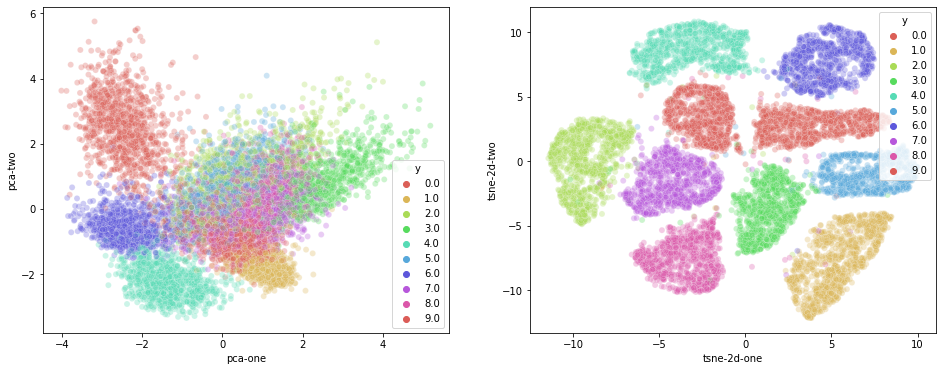

In [68]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# hidden layer - a2

In [70]:
feat_cols= [f'pixel{i}' for i in range(128)]
df_a2 = pd.DataFrame(concated_a2.detach().numpy(), columns=feat_cols)
df_a2['y'] = concated_label.reshape(-1, 1).detach().numpy()
df_a2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,y
0,-0.197258,-0.335852,1.162348,-0.209255,-0.339520,0.001234,0.311854,1.664345,1.926986,0.892509,...,-0.278118,-0.490216,-0.283298,-0.152750,-0.060444,2.377209,0.325949,0.023321,1.941523,3.0
1,-0.185532,-0.236165,-0.093113,-0.257505,-0.029269,0.250762,0.031266,0.021693,0.746776,1.343402,...,0.639481,1.035639,-0.494590,0.015414,2.276087,1.079618,0.499190,-0.088999,0.040120,9.0
2,-0.504317,-0.548021,-0.137381,-0.277126,0.001962,-0.696176,-0.199905,3.742372,1.660114,0.345894,...,-0.919379,-0.496372,-0.126259,-0.522850,-1.393685,3.161877,-0.249275,0.224777,3.187582,2.0
3,-0.539001,-0.228850,-0.491496,-0.039873,-0.074001,-0.858473,-0.702525,1.544464,-0.103566,1.406194,...,-0.233514,-0.467619,-0.630698,-0.151919,2.665570,-0.730984,1.344159,0.005448,1.569167,0.0
4,0.480676,-0.351860,-0.387789,-0.372658,-0.156370,1.327943,0.495379,0.708361,0.587544,0.137893,...,0.798642,1.067544,-0.234681,-0.185266,0.604236,2.779598,-0.109388,-0.060876,0.050264,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.197480,-0.198713,0.778047,-0.234332,-0.277986,1.355086,-0.124454,0.790776,0.727047,1.209340,...,1.434656,-0.140287,-0.473333,-0.102406,1.951205,2.101111,1.260135,-0.170751,0.258609,5.0
59996,-0.146909,-0.181781,-0.462035,-0.198039,-0.061267,-0.060693,-0.046910,1.528350,1.042343,0.519806,...,0.265964,-0.316318,-0.225766,-0.224224,1.155390,2.037100,0.021799,0.055333,1.301538,8.0
59997,-0.897177,-0.250668,0.126670,-0.104771,0.013739,-0.725016,-0.759223,1.459953,0.318267,1.610907,...,-0.032643,-0.271698,-0.607242,-0.142343,2.337800,-0.347535,1.532385,-0.024298,1.157470,0.0
59998,-0.631402,-0.524882,-0.034343,-0.415741,0.043391,-0.783272,-0.115529,1.069106,1.064462,1.207413,...,-0.078522,1.280401,-0.378211,-0.043371,0.691905,1.174598,0.260825,0.089097,1.192480,7.0


In [71]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_a2[feat_cols].values)
df_a2['pca-one'] = pca_result[:, 0]
df_a2['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_a2

Explained variation per principal component: [0.28589413 0.22082949]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,y,pca-one,pca-two
0,-0.197258,-0.335852,1.162348,-0.209255,-0.339520,0.001234,0.311854,1.664345,1.926986,0.892509,...,-0.283298,-0.152750,-0.060444,2.377209,0.325949,0.023321,1.941523,3.0,7.101823,-0.718534
1,-0.185532,-0.236165,-0.093113,-0.257505,-0.029269,0.250762,0.031266,0.021693,0.746776,1.343402,...,-0.494590,0.015414,2.276087,1.079618,0.499190,-0.088999,0.040120,9.0,0.372110,-1.752241
2,-0.504317,-0.548021,-0.137381,-0.277126,0.001962,-0.696176,-0.199905,3.742372,1.660114,0.345894,...,-0.126259,-0.522850,-1.393685,3.161877,-0.249275,0.224777,3.187582,2.0,8.253028,4.395406
3,-0.539001,-0.228850,-0.491496,-0.039873,-0.074001,-0.858473,-0.702525,1.544464,-0.103566,1.406194,...,-0.630698,-0.151919,2.665570,-0.730984,1.344159,0.005448,1.569167,0.0,-2.979733,8.252995
4,0.480676,-0.351860,-0.387789,-0.372658,-0.156370,1.327943,0.495379,0.708361,0.587544,0.137893,...,-0.234681,-0.185266,0.604236,2.779598,-0.109388,-0.060876,0.050264,1.0,0.316963,-4.964282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.197480,-0.198713,0.778047,-0.234332,-0.277986,1.355086,-0.124454,0.790776,0.727047,1.209340,...,-0.473333,-0.102406,1.951205,2.101111,1.260135,-0.170751,0.258609,5.0,-2.909298,-0.791570
59996,-0.146909,-0.181781,-0.462035,-0.198039,-0.061267,-0.060693,-0.046910,1.528350,1.042343,0.519806,...,-0.225766,-0.224224,1.155390,2.037100,0.021799,0.055333,1.301538,8.0,0.771900,1.134471
59997,-0.897177,-0.250668,0.126670,-0.104771,0.013739,-0.725016,-0.759223,1.459953,0.318267,1.610907,...,-0.607242,-0.142343,2.337800,-0.347535,1.532385,-0.024298,1.157470,0.0,-1.760849,7.319322
59998,-0.631402,-0.524882,-0.034343,-0.415741,0.043391,-0.783272,-0.115529,1.069106,1.064462,1.207413,...,-0.378211,-0.043371,0.691905,1.174598,0.260825,0.089097,1.192480,7.0,5.936394,0.835972


In [72]:
np.random.seed(42)
rndperm = np.random.permutation(df_a2.shape[0])
rndperm

N =10000
df_subset = df_a2.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.28279373 0.22567533]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.861266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.103867
[t-SNE] KL divergence after 300 iterations: 2.464436
t-SNE done! Time elapsed: 13.086144208908081 seconds


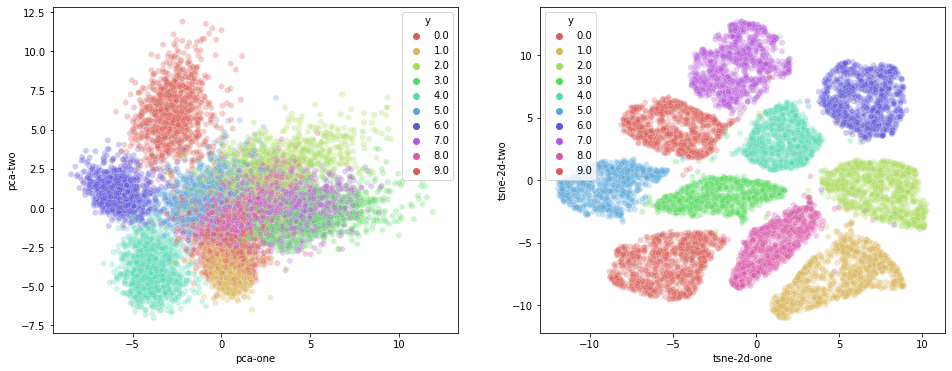

In [73]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()